# Decision Trees

### We use them every day

![tree](img/tree.jpeg)

In [7]:
import pandas
import sklearn

## Objectives

By the end of the lesson students will be able to:
- Summarize the intuitive logic behind decision trees
- Describe how we can use Gini-Entropy measures for measuring the pureness of a node.
- Identify Pros and cons of the decision trees
- Identify hyperparameters we can adjust in `sklearn` for decision trees
- build a decision tree in `sklearn`


The key tool of decision trees is that some attributes provide more _information_ than others when trying to make a decision.<br>
And we rank attributes in the hierarchy based on how useful they are.

### Example 1 - when looking to monogamously date someone
Which is more important?

Their taste in music?
![music](img/music.png)

Or if they are married already?
![married2](img/married2.png)

### Example 2 - when looking for someone to pet sit your cat
Which is more important?

How many cats **they** have:

![cats](img/cats.gif)

How many cats have **died** on their watch while pet sitting:

![petcem](img/petcem.gif)

### Example 3 with some vocab
Rory is a teenager trying to decide if he wants to go to a party, and this is the decision tree represtinging his process:

#### His decision tree
![party](img/party.png)

( image from this [site](https://chunml.github.io/ChunML.github.io/tutorial/Decision-Tree/) )

### Vocabulary: nodes

![nodes](img/terminology1.png)

**Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets.

**Decision Node**: When a sub-node splits into further sub-nodes, then it is called decision node.

**Leaf/ Terminal Node**: Nodes do not split is called Leaf or Terminal node.

**Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

### Vocabulary: splits & branches

![split](img/terminology2.png)

**Splitting**: It is a process of dividing a node into two or more sub-nodes.

**Branch / Sub-Tree:** A sub section of decision tree is called branch or sub-tree.

### Example 4: with data

Suppose we're working on a classification algorithm designed to **sort customers into two classes: those who pay their sales bills and those who don't**.

Each row in my dataframe represents a customer, and I have many predictors (columns) in my dataframe, including:

- salary
- total_bill
- club_member (boolean)
- years_post-sec_ed

Let's look at a simple set of data. **The 'paid' column is our target or dependent variable.**

In [8]:
import pandas as pd
custs = pd.DataFrame([[45000, 1000, True, 2, False], [70000, 100, True, 10, True],
             [30000, 2000, False, 0, False], [90000, 500, True, 2, True],
             [70000, 200, True, 5, False]],
            columns=['salary', 'total_bill', 'club_member', 'years_post-sec_ed',
                    'paid'])


In [9]:
custs

,salary,total_bill,club_member,years_post-sec_ed,paid
0,45000,1000,True,2,False
1,70000,100,True,10,True
2,30000,2000,False,0,False
3,90000,500,True,2,True
4,70000,200,True,5,False


## Partitioning

I partition my data by asking a question about the independent variables. The goal is to ask the right questions in the right order so that the resultant groups are "pure" with respect to the dependent variable. More on this below!


### Let's explore some variables below:

In [29]:
test = custs.sort_values(['salary'])
test

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


### Is the customer a club member?

This would divide my data into two groups (one is my yellow highlighted rows and the other is aqua):

In [30]:
def highlight_split(x):
    if x.club_member == True:
        return ['background-color: yellow']*5
    else:
        return ['background-color: aqua']*5 
test.style.apply(highlight_split, axis=1)

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


**Group 1 (Yellow Group):**

- 2 customers who paid 2 customers who did not

**Group 2 (Aqua Group):**

- One customer who did not

While I've isolated one of the customers who haven't paid in the second group, the first group is an even mix of payers and non-payers. So this split is not particularly good.

Would a different question split our data more effectively? Let's try:

### "Is the customer's salary less than $60k?"

Again we divide the data into two groups (Yellow are the customers who have a salary less than $60,000):

In [31]:
def highlight_split(x):
    if x.salary < 60000:
        return ['background-color: yellow']*5
    else:
        return ['background-color: aqua']*5 
test.style.apply(highlight_split, axis=1)

,salary,total_bill,club_member,years_post-sec_ed,paid
2,30000,2000,False,0,False
0,45000,1000,True,2,False
1,70000,100,True,10,True
4,70000,200,True,5,False
3,90000,500,True,2,True


**Group 1 (Yellow Group):**

- 2 customers who paid 2 customers who did not

**Group 2 (Aqua Group):**

- One customer who did not

## Which feature is more accurate in predicting whether and individual pays their bill?  How do you know this??

## Entropy and Information Gain

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**


For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. to look at the entropies of all possible splits, and
2. to choose the split with the lowest entropy.

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

## Gini Impurity

An alternative metric to entropy which measures the **degree or probability of a particular variable being wrongly classified** when it is randomly chosen. But what is actually meant by ‘impurity’? If all the elements belong to a single class, then it can be called pure. 

The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes.


## Which is better?

Gini impurtity and information gain (entropy) will perform the same. However, entropy requires you to compute logarithmic functions, which are computationally expensive so Gini might be preferred. 

<img src='./img/gini_entropy_chart.png' />



As found in *Introduction to Data Mining* by Tan et. al:

`Studies have shown that the choice of impurity measure has little effect on the performance of decision tree induction algorithms. This is because many impurity measures are quite consistent with each other [...]. Indeed, the strategy used to prune the tree has a greater impact on the final tree than the choice of impurity measure.`

## Steps in the Decision Tree Model:

1. Find the best predictor of the output (e.g. using information gain criterion) and make it a root node of the decision tree.
2. Split the data into disjoint subsets containing unique values of the selected input.

3. For each of the subsets: Recurse from (1) while further splitting to completely pure nodes.

## Coding Trees in Python

Scikit-learn has a tree module, which houses both a DecisionTreeClassifier and a DecisionTreeRegressor. The difference, as is probably clear by now, is that the former is for classification problems (discrete target) and the latter is for regression problems (continuous target). Let's use the classifier.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
ct = DecisionTreeClassifier() # Check out all the
                              # hyperparameter options here!

dt_mod = ct.fit(custs.drop('paid', axis=1), custs['paid'])
dt_mod.score(custs.drop('paid', axis=1), custs['paid'])


1.0

Wow we predicted with 100% Accuracy but let's look at some other metrics!

## Your Turn!  

Create a confusion matrix, classification report, report the predicted probabilities for each item in the dataset, plot a ROC Curve, and print the AUC.

In [35]:
# Your code here
y_pred = dt_mod.predict_proba(custs.drop('paid', axis=1))
sklearn.metrics.confusion_matrix(custs.drop('paid',axis=1),y_pred)


ValueError: Classification metrics can't handle a mix of unknown and multilabel-indicator targets

## Visualizing our Decision tree

We can also visualize our decision tree using the `plot_tree` function in the tree module.  Let's take a look at our tree!

In [43]:
custs.totalbill.valuecounts()

AttributeError: 'DataFrame' object has no attribute 'totalbill'

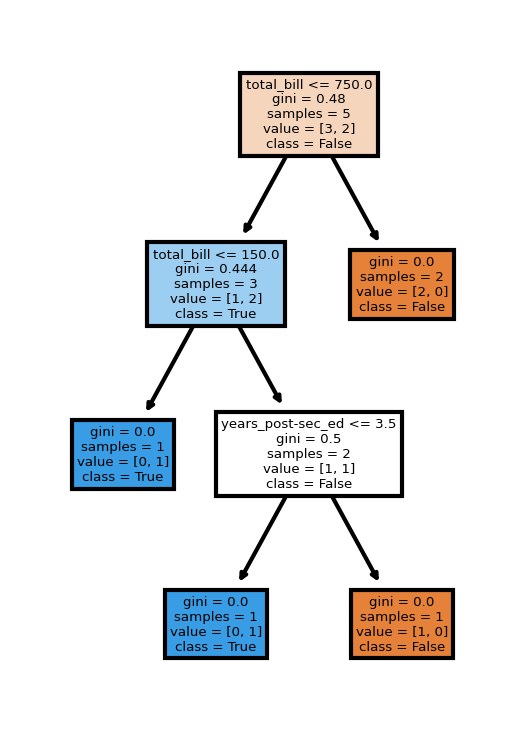

In [36]:
import matplotlib.pyplot as plt
fn=['salary', 'total_bill', 'club_member', 'years_post-sec_ed']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=300)
tree.plot_tree(dt_mod, feature_names=fn, class_names=['False', 'True'], filled=True);

### What do you notice about the leaves of our tree?  What has our model ensured?

### Key Hyperparameters

To avoid overfitting our data we can "prune" our tree by adjusting our hyperparameters
- `min_samples_split` : the minimum number of samples a note must have before it can be split
- `min_samples_leaf` : the minimum numbers of samples a leaf node must have
- `max_leaf_nodes` : the maximum number of leaf nodes
- `max_features` : the maximum number of features that are evaluated for splitting at each node
- `max_depth`: the maximum depth the tree can go
- `min_impurity_split` : a threshold of impurity required to split a node


Choose 2 hyperparameters to adjust and rerun your model again.  Were you able to prevent the "perfect fit"?

In [ ]:
#Your code here

### Pros and Cons of Decision Trees

#### Pros:
- Easy to Understand
- Useful in Data exploration
- Can capture non-linear patterns
- Does not require as many preprocessing steps
- Less data cleaning required
- Data type is not a constraint
- Non Parametric Method


#### Cons:
- Prone to over-fitting
- Sensitive to noisy data
- Small variations in data can greatly influence the algorithm
- Struggles with creating cut-off splits with continuous variables
- Biased with imbalanced data


## Time to Practice!

1. Using the `Vehicle_loan_default` dataset create a vanilla decision tree classifier that predicts `loan_default`.  Use at least 8 features!

2. Now, change at least 2 of your hyperparameters of your decision tree model.  Compare the metrics of both your models.  Which one does better?

3.  BONUS!  Create a KNN model to predict `loan_default`.  Which model does better, KNN or decision tree?  With what hyperparameters? What metric did you use to compare?


In [ ]:
# your code here

---
# Appendix

## Calculating Entropy

The entropy of the whole dataset is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group.

To repeat, in the present case we have only two groups of interest: the payers (2/5) and the non-payers (3/5).

So our entropy for this toy dataset is:

$-0.4*\log_2(0.4) -0.6*\log_2(0.6)$.

Let's use the ```math``` library to calculate this:

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups. Let's calculate the entropy of the split produced by our question above about salary:

Group 1:

$E_{g1} = 0 * \log_2(0) - 1 * \log_2(1) = 0$. This is a pure group! The probability of being a payer in Group 1 is 0 and the probability of being a non-payer in Group 1 is 1.

Group 2:

$E_{g2} = \frac{2}{3} * \log_2\left(\frac{2}{3}\right) - \frac{1}{3} * \log_2\left(\frac{1}{3}\right)$.

Once again, using ```math```:

To get the whole entropy for this split, we'll do a weighted sum of the two group entropies:

#### Deeper Dive on Entropy
- https://towardsdatascience.com/demystifying-entropy-f2c3221e2550
- https://towardsdatascience.com/entropy-is-a-measure-of-uncertainty-e2c000301c2c

## Gini Impurity

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_i p_i^2$,

where, again, $p_i$ is the probability of belonging to the $i$th group.


Great explanation on the derivation fo the Gini index.

https://www.quora.com/What-is-the-interpretation-and-intuitive-explanation-of-Gini-impurity-in-decision-trees